# Lets try to predict CRA of alzheimer disease

![](http://yourcooladviser.in/wp-content/uploads/2017/06/stages-of-alzheimers-disease-21.jpg)

In [119]:
%matplotlib inline
import keras
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches







In [120]:


from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [121]:
cross1=pd.read_csv('oasis_longitudinal.csv') 
cross1 = cross1.fillna(method='ffill')
cross2=pd.read_csv('oasis_cross-sectional.csv')
cross2 = cross2.fillna(method='ffill')

In [122]:
cross1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [123]:
cross2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,NaN


In [124]:
cross1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           373 non-null float64
MMSE          373 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [125]:
cross2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,NaN


In [126]:
cross2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
ID       436 non-null object
M/F      436 non-null object
Hand     436 non-null object
Age      436 non-null int64
Educ     436 non-null float64
SES      436 non-null float64
MMSE     436 non-null float64
CDR      436 non-null float64
eTIV     436 non-null int64
nWBV     436 non-null float64
ASF      436 non-null float64
Delay    20 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


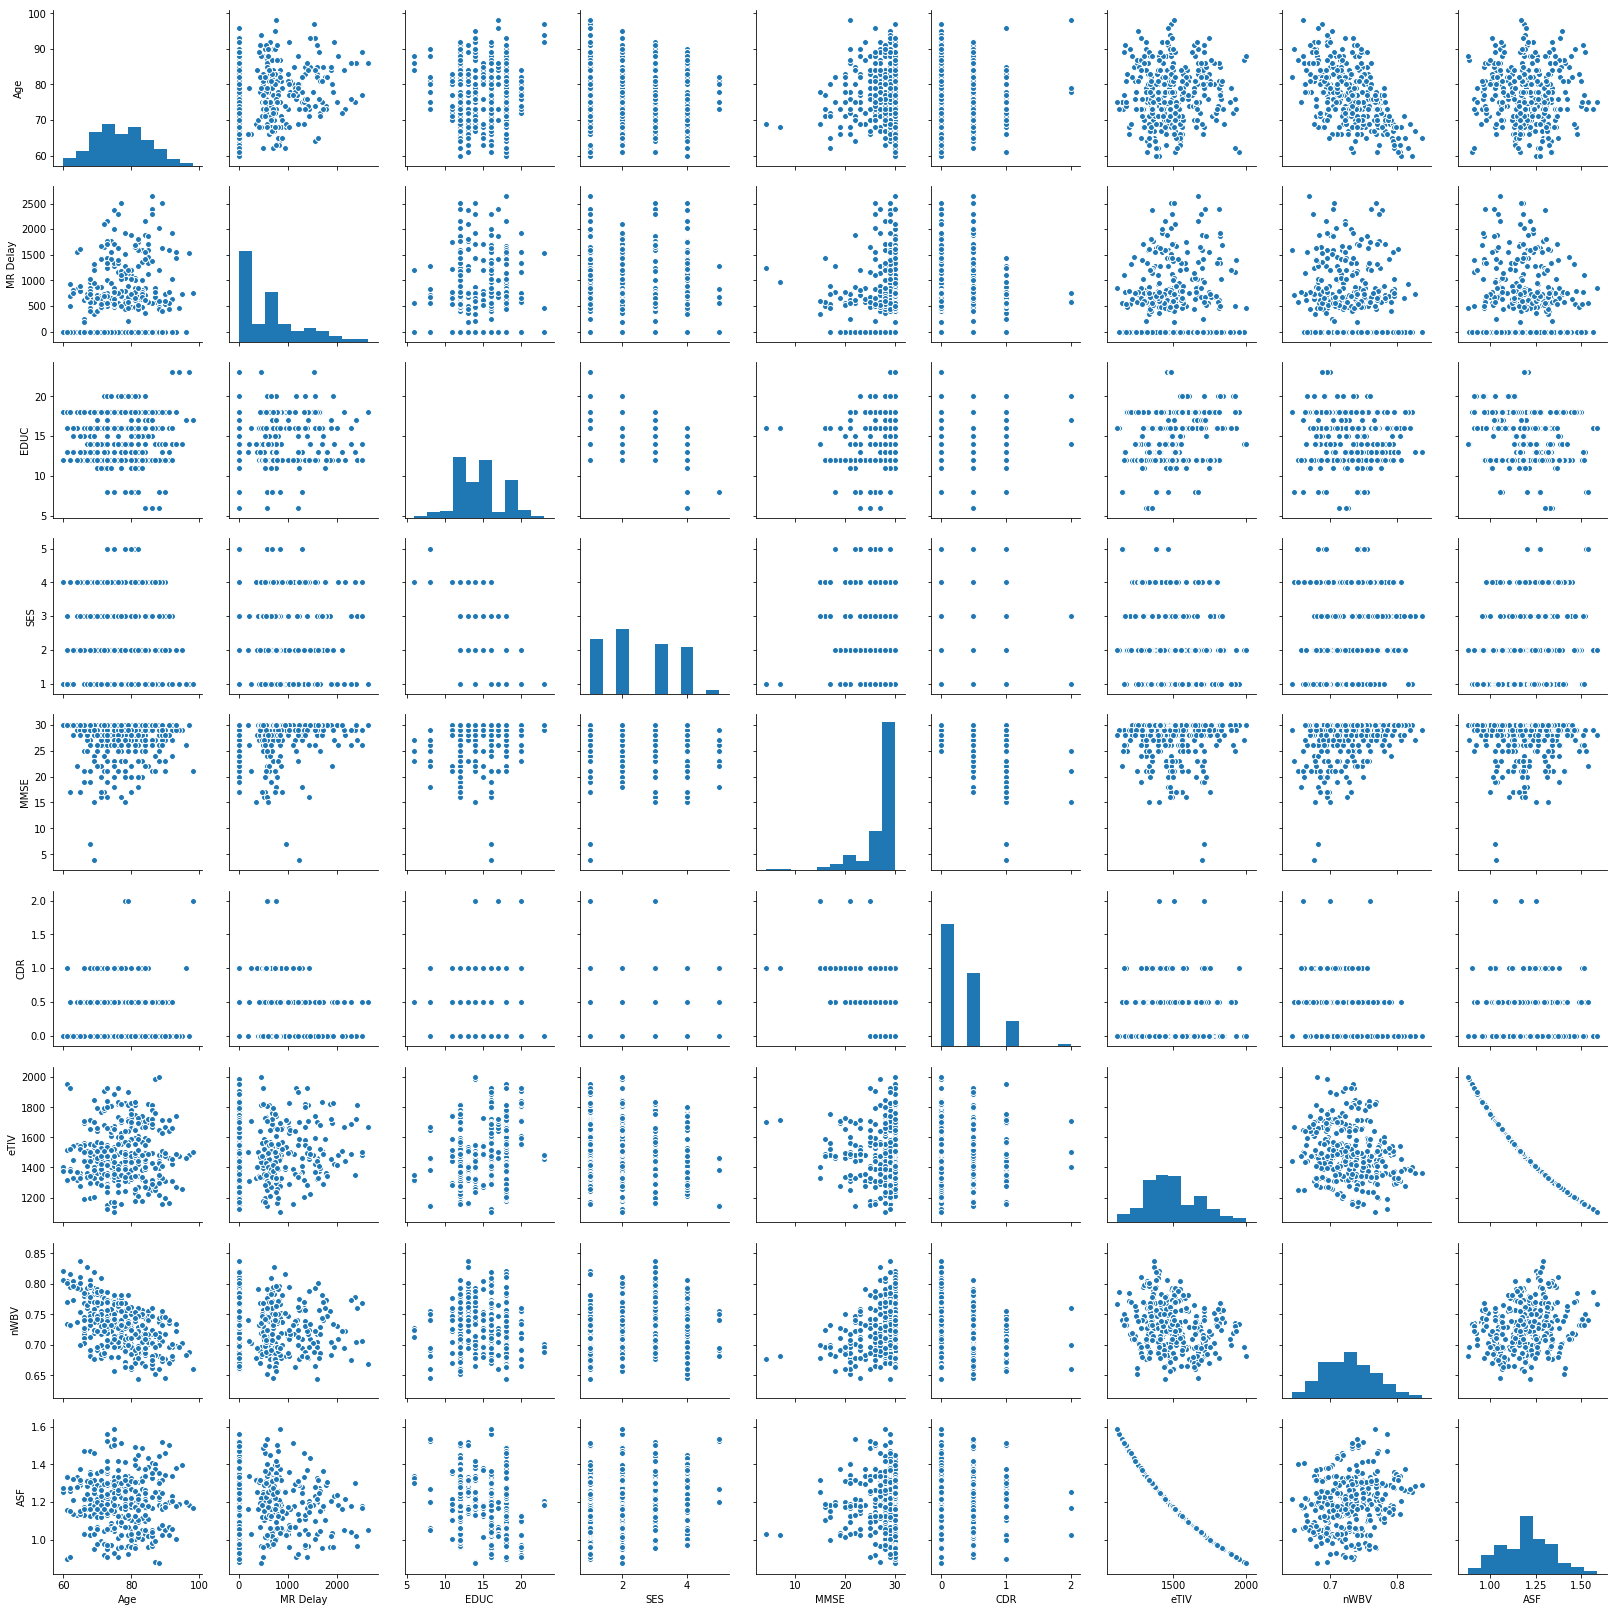

In [127]:
%pylab inline
#lets plot some graphics from the first dataset

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=cross1.fillna('')
sns_plot = sns.pairplot(x[cols])

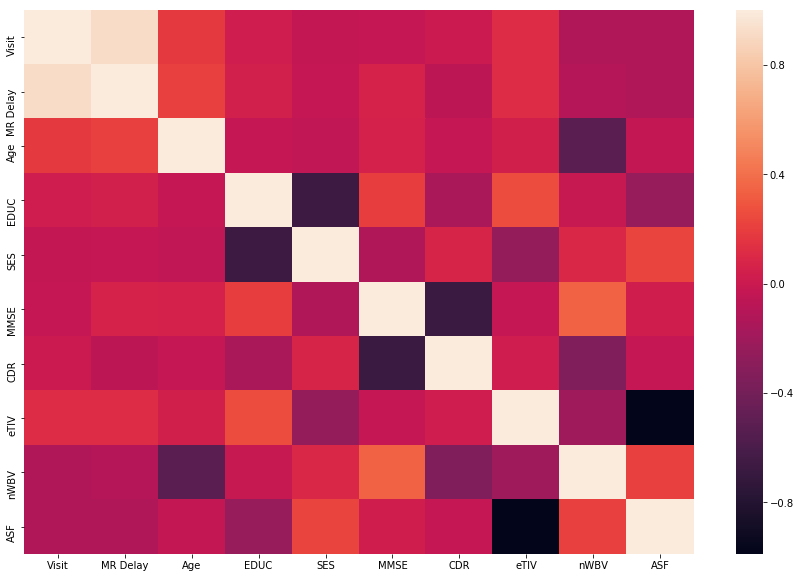

In [128]:
#lets plot correleation matrix
corr_matrix =cross1.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix)

In [129]:
cross1.drop(['MRI ID'], axis=1, inplace=True)
cross1.drop(['Visit'], axis=1, inplace=True)

In [130]:
#cdr=cross1["CDR"]
cross1['CDR'].replace(to_replace=0.0, value='A', inplace=True)
cross1['CDR'].replace(to_replace=0.5, value='B', inplace=True)
cross1['CDR'].replace(to_replace=1.0, value='C', inplace=True)
cross1['CDR'].replace(to_replace=2.0, value='D', inplace=True)

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
for x in cross1.columns:
    f = LabelEncoder()
    cross1[x] = f.fit_transform(cross1[x])

In [132]:
cross1.head()

,Subject ID,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,2,0,1,0,27,5,1,14,0,284,35,1
1,0,2,15,1,0,28,5,1,17,0,285,20,0
2,1,1,0,1,0,15,3,1,10,1,231,73,52
3,1,1,32,1,0,16,3,1,15,1,254,51,32
4,1,1,185,1,0,20,3,1,9,1,238,40,46


# Lets begin some machine learning

In [136]:
train, test = train_test_split(cross1, test_size=0.3)

In [137]:
X_train = train[['M/F', 'Age', 'EDUC', 'SES',  'eTIV', 'ASF']]
y_train = train.CDR
X_test = test[['M/F', 'Age', 'EDUC', 'SES',  'eTIV',  'ASF']]
y_test = test.CDR

In [138]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [139]:
y_train=np.ravel(y_train)
X_train=np.asarray(X_train)

y_test=np.ravel(y_test)
X_test=np.asarray(X_test)


#  So We're starting with Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [141]:
classifier.score(X_test, y_test)

0.6160714285714286

In [142]:
classifier.score(X_train, y_train)

0.6168582375478927

# Now we're trying Decision Trees

In [143]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=12)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print (classifier.score(X_train, y_train))
print (classifier.score(X_test, y_test))

0.9923371647509579
0.6428571428571429


# Now we're trying K Neighbors, with n:=2

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
prediction = knn.predict(X_test)
print(knn.score(X_test, y_test))


0.8505747126436781
0.6428571428571429


# Now we're trying Support Vector machine with linear kernel

In [145]:
from sklearn.svm import SVC
svc=SVC(kernel="linear", C=0.01)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [146]:
svc.score(X_test, y_test)

0.5892857142857143

In [147]:
svc.score(X_train, y_train)

0.5363984674329502

In [148]:
X_train.shape

(261, 6)

## Now trying Deep neural network using TENSORFLOW

In [149]:
import tensorflow as tf
from sklearn import metrics
feature_x = 'x'  # Name of the input feature.
feature_columns = [tf.feature_column.numeric_column(feature_x, shape=np.array(X_train).shape[1:])]

classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns, hidden_units=[35,70, 35], n_classes=4)

  # Training the network
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_train}, y=y_train, num_epochs=100, shuffle=False)
classifier.train(input_fn=train_input_fn, steps=1000)

  # Predict.
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_test}, y=y_test, num_epochs=1, shuffle=False)
predictions = classifier.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['class_ids'] for p in predictions))
y_predicted = y_predicted.reshape(np.array(y_test).shape)

  # Score with sklearn.
score = metrics.accuracy_score(y_test, y_predicted)
print('Accuracy (sklearn): {0:f}'.format(score))

  # Score with tensorflow.
scores = classifier.evaluate(input_fn=test_input_fn)
print('Accuracy (tensorflow): {0:f}'.format(scores['accuracy']))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdk5srlnc', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2eb6898668>, '_is_chief': True, '_tf_random_seed': None, '_service': None, '_save_checkpoints_steps': None, '_task_id': 0, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_task_type': 'worker', '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpdk5srlnc/model.ckpt.
INFO:tensorflow:step = 1, loss = 179.97873
INFO:tensorflow:global_step/sec: 577.021
INFO:tensorflow:step = 101, loss = 50.607086 (0.173 sec)
INFO:tensorflow:global_step/sec: 665.224
INFO:tensorflow:step = 201, loss = 24.162968 (0.150 sec)
INFO:tensorflow:Saving checkpoints for 204 into /tmp/tmpdk5srln

In [150]:
y_train

array([1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 3, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

# Now trying different combination of data, as we've two kinds of data which may have some spatial information available

In [151]:
cross1.head()

,Subject ID,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,2,0,1,0,27,5,1,14,0,284,35,1
1,0,2,15,1,0,28,5,1,17,0,285,20,0
2,1,1,0,1,0,15,3,1,10,1,231,73,52
3,1,1,32,1,0,16,3,1,15,1,254,51,32
4,1,1,185,1,0,20,3,1,9,1,238,40,46


In [152]:
cross2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,NaN


In [153]:
#lets encode second dataset
for x in cross2.columns:
    f = LabelEncoder()
    cross2[x] = f.fit_transform(cross2[x])

In [154]:
#concanting both datasets
df = pd.concat([cross1,cross2])

In [155]:
df = df.fillna(method='ffill')
df.head()


,ASF,Age,CDR,Delay,EDUC,Educ,Group,Hand,ID,M/F,MMSE,MR Delay,SES,Subject ID,eTIV,nWBV
0,1,27,0,NaN,5.0,NaN,2.0,0,NaN,1,14,0.0,1,0.0,284,35
1,0,28,0,NaN,5.0,NaN,2.0,0,NaN,1,17,15.0,1,0.0,285,20
2,52,15,1,NaN,3.0,NaN,1.0,0,NaN,1,10,0.0,1,1.0,231,73
3,32,16,1,NaN,3.0,NaN,1.0,0,NaN,1,15,32.0,1,1.0,254,51
4,46,20,1,NaN,3.0,NaN,1.0,0,NaN,1,9,185.0,1,1.0,238,40


In [156]:
train, test = train_test_split(cross1, test_size=0.3)
X_train1 = train[['ASF', 'Age', 'EDUC', 'Group',  'Hand', 'M/F','MMSE','MR Delay','SES','eTIV','nWBV']]
y_train1 = train.CDR
X_test1 = test[['ASF', 'Age', 'EDUC', 'Group',  'Hand', 'M/F','MMSE','MR Delay','SES','eTIV','nWBV']]
y_test1 = test.CDR

In [157]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train1)

# Scale the train set
X_train1 = scaler.transform(X_train1)

# Scale the test set
X_test1 = scaler.transform(X_test1)

In [158]:
y_train1=np.ravel(y_train1)
X_train1=np.asarray(X_train1)

y_test1=np.ravel(y_test1)
X_test1=np.asarray(X_test1)

In [159]:
X_train1

array([[-0.2684014 ,  0.93746372,  0.09927854, ...,  0.53527751,
         0.29303327, -1.22132438],
       [ 1.78240639,  1.83796121, -0.68592449, ...,  0.53527751,
        -1.76223537,  0.22268768],
       [-1.61203409,  0.29425123,  0.49188006, ..., -1.2791047 ,
         1.5904216 ,  0.22268768],
       ...,
       [-1.00386351, -0.22031876, -1.07852601, ..., -1.2791047 ,
         0.99953187, -0.92048853],
       [ 0.11347315, -0.60624626, -1.07852601, ...,  1.44246861,
        -0.15655674,  1.30569673],
       [ 1.07523129, -0.73488875, -0.29332297, ...,  1.44246861,
        -1.08142763, -1.43190947]])

#  Again like before, we're gonna try logistic regression, decision trees and then Kneighbors and in end neural networks

 # Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train1, y_train1)
prediction = classifier.predict(X_test1)
print(classifier.score(X_train1, y_train1))
print(classifier.score(X_test1, y_test1))

0.8084291187739464
0.7767857142857143


# Decision Trees

In [161]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train1, y_train1)
prediction = classifier.predict(X_test1)
print (classifier.score(X_train1, y_train1))
print (classifier.score(X_test1, y_test1))

0.946360153256705
0.8392857142857143


# Kneighbors

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train1)
print(knn.score(X_train1, y_train1))
prediction = knn.predict(X_test1)
print(knn.score(X_test1, y_test1))

0.9157088122605364
0.7857142857142857


#  Deep Neural Networks

In [165]:
import tensorflow as tf
from sklearn import metrics
feature_x = 'x'  # Name of the input feature.
feature_columns = [
      tf.feature_column.numeric_column(
          feature_x, shape=np.array(X_train1).shape[1:])]

classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns, hidden_units=[35,70,35], n_classes=4)

  # Train.
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_train1}, y=y_train1, num_epochs=100, shuffle=False)
classifier.train(input_fn=train_input_fn, steps=1000)

  # Predict.
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={feature_x: X_test1}, y=y_test1, num_epochs=1, shuffle=False)
predictions = classifier.predict(input_fn=test_input_fn)
y_predicted = np.array(list(p['class_ids'] for p in predictions))
y_predicted = y_predicted.reshape(np.array(y_test1).shape)

  # Score with sklearn.
score = metrics.accuracy_score(y_test1, y_predicted)
print('Accuracy (sklearn): {0:f}'.format(score))

  # Score with tensorflow.
scores = classifier.evaluate(input_fn=test_input_fn)
print('Accuracy (tensorflow): {0:f}'.format(scores['accuracy']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7w5ndrcy', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2eb5641128>, '_is_chief': True, '_tf_random_seed': None, '_service': None, '_save_checkpoints_steps': None, '_task_id': 0, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_task_type': 'worker', '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp7w5ndrcy/model.ckpt.
INFO:tensorflow:step = 1, loss = 197.06279
INFO:tensorflow:global_step/sec: 569.584
INFO:tensorflow:step = 101, loss = 2.4118733 (0.176 sec)
INFO:tensorflow:global_step/sec: 652.063
INFO:tensorflow:step = 201, loss = 0.21819055 (0.153 sec)
INFO:tensorflow:Saving checkpoints for 204 into /tmp/tmp7w5ndr

### Conclusion: As we can see Decision Tree seems to be performing better clearly coz of over fitting, we can involve metrics like leaf pruning but still neural networks should have best performance. So in our case we need much more data for performing state of the art accuracy in computer vision fields like 99.99%